# MOSFET Linear Amplifier Analysis

## Initial Parameters
$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
W & \text{Channel Width} & 40\text{ }\mu\text{m} \\
L & \text{Channel Length} & 1.6\text{ }\mu\text{m} \\
K_n' & \text{Process Transconductance} & 50\text{ }\mu\text{A}/\text{V}^2 \\
V_{to} & \text{Threshold Voltage} & 0.5\text{ V} \\
C_{ox} & \text{Gate Oxide Capacitance} & 2.3\text{ mF}/\text{m}^2 \\
\lambda & \text{Channel Length Modulation} & 0.0625\text{ V}^{-1} \\
\gamma & \text{Body Effect Parameter} & 0.6\text{ V}^{1/2} \\
\phi & \text{Surface Potential} & 0.8\text{ V} \\
\hline
\end{array}
$$

## Circuit Conditions
$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
I_{BB} & \text{DC Bias Current} & 250\text{ }\mu\text{A} \\
V_{DD} & \text{DC Supply Voltage} & 5\text{ V} \\
V_{BB} & \text{DC Bias Voltage} & 2.5\text{ V} \\
R & \text{Resistance} & 10\text{ k}\Omega \\
\hline
\end{array}
$$




In [48]:
W = 40e-6
L = 1.6e-6
KN_PRIME = 50e-6
V_TO = 0.5
C_OX = 2.3e-3

I_BB = 250e-6
V_DD = 5
V_BB = 2.5
V_DS = 2.5
R = 10e3

## Equations

### Channel Length Modulation Parameter
$$\lambda(L) = \frac{0.1μm \cdot V^{-1}}{L}$$

### MOSFET Saturation Region Current
$$I_D = \frac{1}{2}K_n'\frac{W}{L}(V_{GS} - V_{to})^2(1 + \lambda V_{DS})$$

Where:
- $I_D$ is biased by $I_{BB}$ at 250μA
- We need to solve for $V_{GS}$

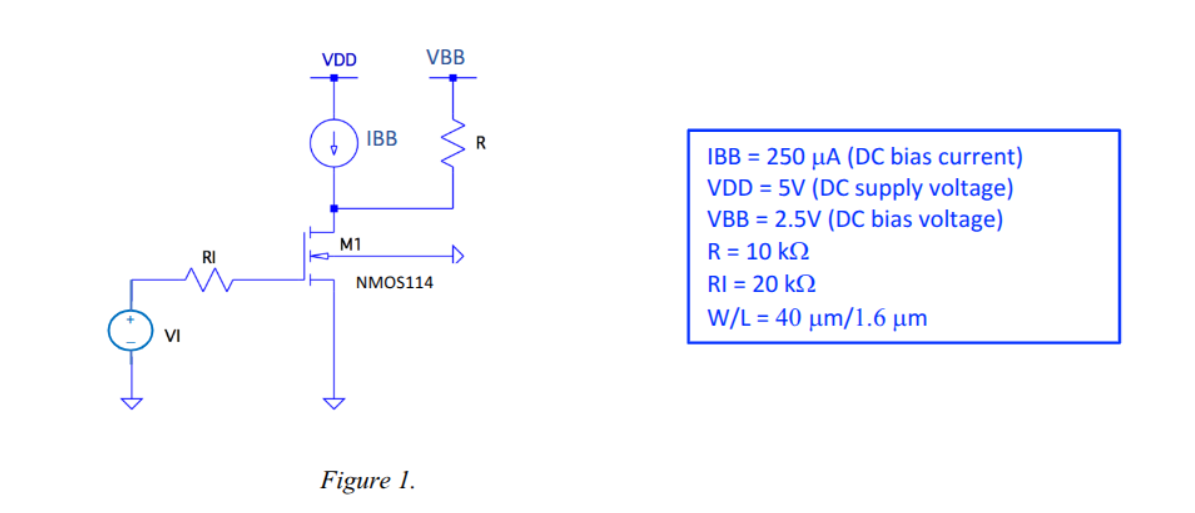

## Calculations

### Solving for Channel Length Modulation

In [49]:
lambda_val = 0.1e-6/L
print(lambda_val)

0.0625


### Threshold Voltage ($V_{TH}$)

### Given Parameters
$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
V_{to} & \text{Threshold Voltage} & 0.5\text{ V} \\
\gamma\text{ (Gamma)} & \text{Body Effect Parameter} & 0.6\text{ V}^{1/2} \\
\phi\text{ (phi)} & \text{Surface Potential} & 0.8\text{ V} \\
V_{SB} & \text{Source-Bulk Voltage} & 0\text{ V} \\
\hline
\end{array}
$$

### Circuit Analysis
Since both the Source and Bulk are connected to ground:
- Source voltage = 0V
- Bulk voltage = 0V
- Therefore, $V_{SB} = V_S - V_B = 0\text{ V}$

Similarly, to solve the Drain and Bulk
- Drain voltage = 2.5V
- Bulk voltage = 0V
- Therefore, $V_{DB} = V_D - V_B = 2.5\text{ V}$



### Threshold Voltage Equation
$$V_{TH} = V_{to} + \gamma(\sqrt{\phi + V_{SB}} - \sqrt{\phi})$$

In [50]:
import math

GAMMA = 0.6    # V^(1/2)
PHI = 0.8      # V
V_SB = 0       # V
V_DB = 2.5     # V

# Calculate Vth
Vth = V_TO + GAMMA * (math.sqrt(PHI + V_SB) - math.sqrt(PHI))

print(f"VTH = {Vth:.1f} V")

VTH = 0.5 V


Given that $\lambda = 0.0625\text{ V}^{-1}$, and $V_{TH} = 0.5V$ we can solve for $V_{GS}$ using the saturation region equation:
### Solving for $V_{GS}$ using the saturation region equation

In [51]:
# Calculate beta term
beta = KN_PRIME * (W/L)
Id = I_BB

# Solve for Vgs using saturation equation
# ID = (1/2) * beta * (Vgs - Vto)^2 * (1 + lambda * Vds)
term1 = 2 * Id / (beta * (1 + lambda_val * V_DS))
Vgs = math.sqrt(term1) + Vth

print(f"VGS = {Vgs:.3f} V")

VGS = 1.088 V


### Small Signal Parameters Calculation
Given Values:

$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
V_{GS} & \text{Gate-Source Voltage} & 1.088\text{ V} \\
V_{TH} & \text{Threshold Voltage} & 0.5\text{ V} \\
\hline
\end{array}
$$

#### Small Signal Equations

Transconductance:
$$g_m = \frac{2I_D}{V_{GS} - V_{TH}}$$
Output Conductance:
$$g_{ds} = \lambda \cdot I_D$$
Gate-to-Source Capacitance:
$$C_{gs} = \frac{2}{3} \cdot C_{ox} \cdot W \cdot L$$

In [52]:

# Calculate gm
gm = (2 * Id) / (Vgs - Vth)

# Calculate gds
gds = lambda_val * Id

# Calculate Cgs
Cgs = Cgd = (2/3) * C_OX * W * L

print(f"gm = {gm*1e3:.3f} mS")
print(f"gds = {gds*1e6:.3f} µS")
print(f"Cgs = {Cgs*1e15:.3f} fF")
print(f"Cgd = {Cgs*1e15:.3f} fF")

gm = 0.850 mS
gds = 15.625 µS
Cgs = 98.133 fF
Cgd = 98.133 fF



As expected, the the analysis of the MOSFET parameters yielded the following results:

$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
g_m & \text{Transconductance} & 850\text{ }\mu\text{S} \\
g_{ds} & \text{Output Conductance} & 15.625\text{ }\mu\text{S} \\
C_{gs} & \text{Gate-Source Capacitance} & 98.133\text{ fF} \\
\hline
\end{array}
$$

## Capacitance Analysis

### Device Parameters
The following parameters are required for extrinsic capacitance calculations:

$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
\text{CGDO, CGSO} & \text{Gate-Drain/Source Overlap Capacitance} & 0.5\text{ fF}/\mu\text{m} \\
\text{CJ} & \text{Zero-Bias Area Capacitance} & 0.1\text{ fF}/\mu\text{m}^2 \\
\text{CJSW} & \text{Zero-Bias Sidewall Capacitance} & 0.5\text{ fF}/\mu\text{m} \\
\text{PB} & \text{Junction Potential} & 0.95\text{ V} \\
\text{PBSW} & \text{Junction Potential Sidewall} & 0.95\text{ V} \\
\text{MJ} & \text{Area Junction Grading Coefficient} & 0.5 \\
\text{MJSW} & \text{Sidewall Junction Grading Coefficient} & 0.33 \\
\text{HDIF} & \text{Half Length of S/D Diffusion} & 1.5\text{ }\mu\text{m} \\
\hline
\end{array}
$$

The following equations are used to determine the intermediate values:

1. Diffusion Length:
   * $L_{DIF} = 2 \times HDIF = 2 \times 1.5\text{ }\mu\text{m} = 3\text{ }\mu\text{m}$

2. Source/Drain Areas:
   * $A_d = A_s = 2 \times HDIF \times W = 2 \times 1.5\text{ }\mu\text{m} \times 40\text{ }\mu\text{m} = 120\text{ }\mu\text{m}^2$

3. Source/Drain Perimeters:
   * $P_d = P_s = 2 \times L_{DIF} + W = 2 \times 3\text{ }\mu\text{m} + 40\text{ }\mu\text{m} = 46\text{ }\mu\text{m}$

In [53]:
HDIF = 1.5e-6  # m
CGDO = CGSO = 0.5e-15  # F/m
CJ = 0.1e-15 * 1e12  # F/m²
CJSW = 0.5e-15 * 1e6  # F/m
PB = PBSW = 0.95  # V
MJ = 0.5
MJSW = 0.33

# Calculate intermediate values
LDIF = 2 * HDIF  # meters
Ad = As = 2 * HDIF * W  # Area of drain/source in m²
Pd = Ps = 2 * LDIF + W  # Perimeter of drain/source in m

print(f"LDIF = {LDIF*1e6:.1f} μm")
print(f"Ad = As = {Ad*1e12:.1f} μm²")
print(f"Pd = Ps = {Pd*1e6:.1f} μm")

LDIF = 3.0 μm
Ad = As = 120.0 μm²
Pd = Ps = 46.0 μm


Now knowing that the drain and source areas ($A_d$, $A_s$) are both 120 μm²  and their perimeters ($P_d$, $P_s$) are both 46 μm, we can solve for the drain-bulk ($C_{db}$) and source-bulk ($C_{sb}$)

### Junction Equations
The drain-bulk and source-bulk junction capacitances are given by:

1. Drain-Bulk Capacitance:
   $$C_{db} = \frac{A_d \cdot CJ}{(1 + \frac{V_{DB}}{PB})^{MJ}} + \frac{P_D \cdot CJSW}{(1 + \frac{V_{DB}}{PBSW})^{MJSW}}$$

2. Source-Bulk Capacitance:
   $$C_{sb} = \frac{A_s \cdot CJ}{(1 + \frac{V_{SB}}{PB})^{MJ}} + \frac{P_S \cdot CJSW}{(1 + \frac{V_{SB}}{PBSW})^{MJSW}}$$

### Known Values
$$
\begin{array}{|l|l|l|}
\hline
\text{Parameter} & \text{Purpose} & \text{Value} \\
\hline
A_d, A_s & \text{Drain/Source Area} & 120\text{ }\mu\text{m}^2 \\
P_d, P_s & \text{Drain/Source Perimeter} & 46\text{ }\mu\text{m} \\
V_{DB} & \text{Drain-Bulk Voltage} & 2.5\text{V} \\
V_{SB} & \text{Source-Bulk Voltage} & 0\text{ V} \\
\hline
\end{array}
$$




In [54]:

# Calculate source-bulk capacitance components
Csb_area = As * CJ / (1 + V_SB/PB)**MJ
Csb_perim = Ps * CJSW / (1 + V_SB/PBSW)**MJSW
Csb = Csb_area + Csb_perim

# Calculate drain-bulk capacitance components
Cdb_area = Ad * CJ / (1 + V_DB/PB)**MJ
Cdb_perim = Pd * CJSW / (1 + V_DB/PBSW)**MJSW
Cdb = Cdb_area + Cdb_perim

print("Junction Capacitance Results:")
print("----------------------------")
print(f"Csb = {Csb*1e15:.3f} fF")
print(f"Cdb = {Cdb*1e15:.3f} fF")


Junction Capacitance Results:
----------------------------
Csb = 35.000 fF
Cdb = 21.325 fF


## Amplifier DC Gain and Bandwidth Analysis

After calculating the small-signal parameters and extrinsic capacitances, we can now determine the amplifier's DC gain and bandwidth.

Key equations:
* Output resistance: $r_o = \frac{1}{\lambda I_D}$
* DC Gain: $A_v = \frac{V_{out}}{V_{in}} = -g_m(r_o||R_L)$
* Unity gain frequency: $f_T = \frac{g_m}{2\pi C_{total}}$
* Bandwidth: $f_{-3dB} = \frac{1}{2\pi R_{eq}C_{total}}$

Where:
* $C_{total} = C_{db} + C_{gd}(1 + |A_v|)$
* $R_{eq} = r_o||R$

Output resistance (ro) = 64.00 kΩ
Equivalent resistance (ro||RL) = 8.65 kΩ
DC Gain = -7.35 V/V (17.3 dB)
Total output capacitance = 840.95 fF
-3dB Bandwidth = 21.88 MHz
Unity gain frequency = 160.89 MHz


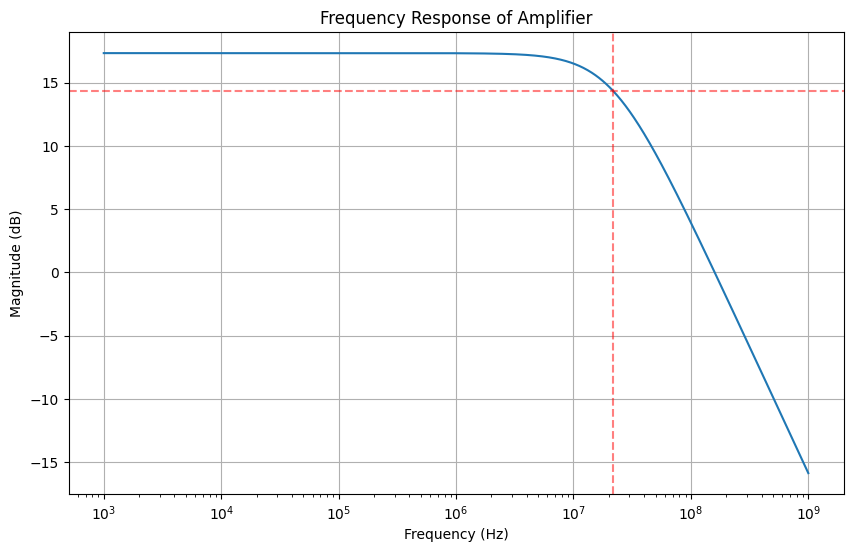

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate output resistance
ro = 1/(lambda_val * Id)

# Calculate equivalent resistance (parallel combination)
R_eq = (ro * R)/(ro + R)

# Calculate DC gain (negative due to common source configuration)
gain_dc = -gm * R_eq
gain_db = 20 * np.log10(abs(gain_dc))

# Calculate total output capacitance
C_total = Cdb + Cgd * (1 + abs(gain_dc))

# Calculate bandwidth
f_3db = 1/(2 * np.pi * R_eq * C_total)

# Calculate unity gain frequency
f_T = gm/(2 * np.pi * C_total)

# Print results
print(f"Output resistance (ro) = {ro/1e3:.2f} kΩ")
print(f"Equivalent resistance (ro||RL) = {R_eq/1e3:.2f} kΩ")
print(f"DC Gain = {gain_dc:.2f} V/V ({gain_db:.1f} dB)")
print(f"Total output capacitance = {C_total*1e15:.2f} fF")
print(f"-3dB Bandwidth = {f_3db/1e6:.2f} MHz")
print(f"Unity gain frequency = {f_T/1e6:.2f} MHz")

# Create frequency response plot
f = np.logspace(3, 9, 1000)  # 1kHz to 1GHz
w = 2 * np.pi * f
H = gain_dc / (1 + 1j * w * R_eq * C_total)
mag_db = 20 * np.log10(np.abs(H))

plt.figure(figsize=(10, 6))
plt.semilogx(f, mag_db)
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response of Amplifier')
plt.axhline(y=gain_db - 3, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=f_3db, color='r', linestyle='--', alpha=0.5)
plt.show()